# <span style="color: green;">Log Filtering Logic</span>

In [1]:
import os
import pandas as pd

def combine_and_filter_csv_files(directory, object_name_filter):
    combined_data = pd.DataFrame()

    # Iterate over all CSV files in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            file_path = os.path.join(directory, filename)
            
            try:
                # Read the current CSV file into a DataFrame
                df = pd.read_csv(file_path)
                
                # Check if the required columns exist
                required_columns = ['Timestamp', 'Object Name', 'Event']
                missing_columns = [col for col in required_columns if col not in df.columns]
                if missing_columns:
                    # print(f"Skipping {filename}: Missing columns {missing_columns}")
                    continue
                
                # Select only the required columns
                df = df[required_columns]

                # Append to the combined DataFrame
                combined_data = pd.concat([combined_data, df], ignore_index=True)
            except Exception as e:
                print(f"Error reading {filename}: {e}")
    
    print(combined_data['Object Name'].unique())
    # Filter rows by object name
    filtered_data = combined_data[combined_data['Object Name'].isin(object_name_filter)]

    # Convert 'Timestamp' to datetime and sort
    filtered_data['Timestamp'] = pd.to_datetime(filtered_data['Timestamp'], errors='coerce')
    filtered_data = filtered_data.dropna(subset=['Timestamp']).sort_values(by='Timestamp')
    
    return filtered_data


# <span style="color: green;">UML Code Generation Logic</span>

In [2]:
import re

def create_plantuml_sequence(logs):
    plantuml_code = '@startuml\n'
    
    # Add participants (Object Names)
    participants = set()
    for log in logs:
        parts = log.split(",")
        object_name = parts[1].strip()
        participants.add(object_name)
    
    # Add participants to the sequence diagram
    for participant in participants:
        plantuml_code += f'participant {participant}\n'
    
    # Store event mappings
    event_mapping = {}
    event_counter = 1
    
    # Add interactions based on events
    for log in logs:
        parts = log.split(",")
        timestamp = parts[0].strip()  # Extract timestamp
        object_name = parts[1].strip()
        event = parts[2].strip()
        
        # Add event to the mapping with timestamp and event
        event_mapping[event_counter] = f'[{timestamp[11:]}] {event}'  # Keep only time portion (hh:mm:ss)
        
        # Replace event text with number
        plantuml_code += f'{object_name} -> {object_name} : {event_counter}\n'
    
        event_counter += 1
        
    # Add the note with the event mappings (timestamp will be shown here)
    plantuml_code += 'note right of ' + list(participants)[0] + '\n'
    
    for num, msg in event_mapping.items():
        plantuml_code += f'  {num}: {msg}\n'
    
    plantuml_code += 'end note\n'
    plantuml_code += '@enduml\n'
    
    return plantuml_code


# <span style="color: green;">Extracting Certain Records Logic</span>

In [3]:
import csv

csv_file_path = 'CombinedLogs.csv'

def get_specific_line_numbers(csv_file_path, line_numbers_to_store):
    stored_lines = []
    
    # Open the CSV file
    with open(csv_file_path, mode='r') as file:
        reader = csv.reader(file)
        
        # Enumerate through the rows in the CSV file
        for line_number, row in enumerate(reader, start=1):
            # If the current line number is in the list of line numbers to store, save it
            if line_number in line_numbers_to_store:
                stored_lines.append(','.join(row))  # Convert the list row to a string
        
    return stored_lines


# <span style="color: green;">Worker Entering Zone Scenario</span>

## Denied Entry


In [4]:
directory = "..\\logs"  # Replace with the path to your CSV files
object_name_filter = ['RoofZone_GateNode', 
                      'RoofZone_GateNode_controller',
                      'RoofZone_GateNode_scanner',
                      'RoofZone_GateNode_relay',
                      'RoofZone_GateNode_motor',
                      'RoofZone_MasterNode',
                      'RoofZone_MasterNode_controller',
                      ]  # Replace with the object names to filter
result = combine_and_filter_csv_files(directory, object_name_filter)

# Save the DataFrame to a CSV file
result.to_csv('CombinedLogs.csv', index=False)



['RoofZone_UltrasonicNode1_controller' 'RoofZone_UltrasonicNode1'
 'RoofZone_UltrasonicNode2_controller' 'RoofZone_UltrasonicNode2'
 'RoofZone_UltrasonicNode3_controller' 'RoofZone_UltrasonicNode3'
 'RoofZone_UltrasonicNode4_controller' 'RoofZone_UltrasonicNode4'
 'RoofZone_UltrasonicNode5_controller' 'RoofZone_UltrasonicNode5'
 'RoofZone_SmartRopeNode1_controller' 'RoofZone_SmartRopeNode1'
 'RoofZone_SmartRopeNode2_controller' 'RoofZone_SmartRopeNode2'
 'RoofZone_SmartRopeNode3_controller' 'RoofZone_SmartRopeNode3'
 'RoofZone_WindNode_controller' 'RoofZone_WindNode' 'RoofZone'
 'RoofZone_GateNode_controller' 'RoofZone_GateNode'
 'RoofZone_ActuatorNode_controller' 'RoofZone_ActuatorNode'
 'RoofZone_BuzzerNode_controller' 'RoofZone_BuzzerNode'
 'RoofZone_SpeakerNode_controller' 'RoofZone_SpeakerNode'
 'RoofZone_MasterNode_gateway' 'RoofZone_MasterNode_controller'
 'RoofZone_MasterNode' 'Zone2' 'Zone2_GateNode_controller'
 'Zone2_GateNode' 'Zone2_ActuatorNode_controller' 'Zone2_ActuatorN

C:\Users\omarf\AppData\Local\Temp\ipykernel_36232\2106971140.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Timestamp'] = pd.to_datetime(filtered_data['Timestamp'], errors='coerce')


In [5]:
# Example log data as an array of strings
logs = [
'2024-11-26 12:38:16.956494400,RoofZone_GateNode_controller,[SUCCESS] Received field [ID] from object [RoofZone_GateNode_scanner]. Value [Bruno]',
'2024-11-26 12:38:16.971265800,RoofZone_GateNode_controller,Asked Parent Node [RoofZone_GateNode] about ID [Bruno]''s permission',
'2024-11-26 12:38:17.091120900,RoofZone_GateNode,Asked Control Node [RoofZone_ControlNode] about ID [Bruno]''s permission',
'2024-11-26 12:38:17.108066700,RoofZone_ControlNode,Gate [RoofZone_GateNode] queried permission status for ID [Bruno]',
'2024-11-26 12:38:17.110043800,RoofZone_ControlNode_controller,Parent Node [RoofZone_ControlNode] asked if ID [Bruno] is permitted to enter zone. Permission [DENIED]',
'2024-11-26 12:38:17.111659900,RoofZone_ControlNode,Gate [RoofZone_GateNode] queried permission status for ID [Bruno]. Permission [DENIED]',
'2024-11-26 12:38:17.124630100,RoofZone_GateNode,ID [Bruno]''s permission: [DENIED]',
'2024-11-26 12:38:17.151296600,RoofZone_GateNode_controller,ID [Bruno]''s permission: [DENIED]',
'2024-11-26 12:38:17.286158800,RoofZone_GateNode_controller,[SUCCESS] Switched object [RoofZone_GateNode_relay] position [0] to [OFF]'
]

# Generate PlantUML code
plantuml_sequence = create_plantuml_sequence(logs)
print(plantuml_sequence)


@startuml
participant RoofZone_GateNode_controller
participant RoofZone_ControlNode
participant RoofZone_GateNode
participant RoofZone_ControlNode_controller
RoofZone_GateNode_controller -> RoofZone_GateNode_controller : 1
RoofZone_GateNode_controller -> RoofZone_GateNode_controller : 2
RoofZone_GateNode -> RoofZone_GateNode : 3
RoofZone_ControlNode -> RoofZone_ControlNode : 4
RoofZone_ControlNode_controller -> RoofZone_ControlNode_controller : 5
RoofZone_ControlNode -> RoofZone_ControlNode : 6
RoofZone_GateNode -> RoofZone_GateNode : 7
RoofZone_GateNode_controller -> RoofZone_GateNode_controller : 8
RoofZone_GateNode_controller -> RoofZone_GateNode_controller : 9
note right of RoofZone_GateNode_controller
  1: [12:38:16.956494400] [SUCCESS] Received field [ID] from object [RoofZone_GateNode_scanner]. Value [Bruno]
  2: [12:38:16.971265800] Asked Parent Node [RoofZone_GateNode] about ID [Bruno]s permission
  3: [12:38:17.091120900] Asked Control Node [RoofZone_ControlNode] about ID [Br

## Allowed Entry

In [6]:
directory = "..\\logs"  # Replace with the path to your CSV files
object_name_filter = ['RoofZone_GateNode', 
                      'RoofZone_GateNode_controller',
                      'RoofZone_GateNode_scanner',
                      'RoofZone_GateNode_relay',
                      'RoofZone_GateNode_motor',
                      'RoofZone_ControlNode',
                      'RoofZone_ControlNode_controller',
                      ]  # Replace with the object names to filter
result = combine_and_filter_csv_files(directory, object_name_filter)

# Save the DataFrame to a CSV file
result.to_csv('combinedLogs.csv', index=False)



['RoofZone_UltrasonicNode1_controller' 'RoofZone_UltrasonicNode1'
 'RoofZone_UltrasonicNode2_controller' 'RoofZone_UltrasonicNode2'
 'RoofZone_UltrasonicNode3_controller' 'RoofZone_UltrasonicNode3'
 'RoofZone_UltrasonicNode4_controller' 'RoofZone_UltrasonicNode4'
 'RoofZone_UltrasonicNode5_controller' 'RoofZone_UltrasonicNode5'
 'RoofZone_SmartRopeNode1_controller' 'RoofZone_SmartRopeNode1'
 'RoofZone_SmartRopeNode2_controller' 'RoofZone_SmartRopeNode2'
 'RoofZone_SmartRopeNode3_controller' 'RoofZone_SmartRopeNode3'
 'RoofZone_WindNode_controller' 'RoofZone_WindNode' 'RoofZone'
 'RoofZone_GateNode_controller' 'RoofZone_GateNode'
 'RoofZone_ActuatorNode_controller' 'RoofZone_ActuatorNode'
 'RoofZone_BuzzerNode_controller' 'RoofZone_BuzzerNode'
 'RoofZone_SpeakerNode_controller' 'RoofZone_SpeakerNode'
 'RoofZone_MasterNode_gateway' 'RoofZone_MasterNode_controller'
 'RoofZone_MasterNode' 'Zone2' 'Zone2_GateNode_controller'
 'Zone2_GateNode' 'Zone2_ActuatorNode_controller' 'Zone2_ActuatorN

C:\Users\omarf\AppData\Local\Temp\ipykernel_36232\2106971140.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Timestamp'] = pd.to_datetime(filtered_data['Timestamp'], errors='coerce')


In [7]:
# Example log data as an array of strings
logs = [
'2024-11-26 12:38:21.887168400,RoofZone_GateNode_controller,[SUCCESS] Received field [ID] from object [RoofZone_GateNode_scanner]. Value [Omar]',
'2024-11-26 12:38:21.887168400,RoofZone_GateNode_controller,Asked Parent Node [RoofZone_GateNode] about ID [Omar]\'s permission',
'2024-11-26 12:38:21.888161000,RoofZone_GateNode,Asked Control Node [RoofZone_ControlNode] about ID [Omar]\'s permission',
'2024-11-26 12:38:21.903017800,RoofZone_ControlNode,Gate [RoofZone_GateNode] queried permission status for ID [Omar]',
'2024-11-26 12:38:21.903379700,RoofZone_ControlNode_controller,Parent Node [RoofZone_ControlNode] asked if ID [Omar] is permitted to enter zone. Permission [ALLOWED]',
'2024-11-26 12:38:21.903379700,RoofZone_ControlNode,Gate [RoofZone_GateNode] queried permission status for ID [Omar]. Permission [ALLOWED]',
'2024-11-26 12:38:21.918834800,RoofZone_GateNode,ID [Omar]\'s permission: [ALLOWED]',
'2024-11-26 12:38:21.918834800,RoofZone_GateNode_controller,ID [Omar]\'s permission: [ALLOWED]',
'2024-11-26 12:38:21.918834800,RoofZone_GateNode_controller,[SUCCESS] Switched object [RoofZone_GateNode_relay] position [0] to [ON]',

]

# Generate PlantUML code
plantuml_sequence = create_plantuml_sequence(logs)
print(plantuml_sequence)


@startuml
participant RoofZone_GateNode_controller
participant RoofZone_ControlNode
participant RoofZone_GateNode
participant RoofZone_ControlNode_controller
RoofZone_GateNode_controller -> RoofZone_GateNode_controller : 1
RoofZone_GateNode_controller -> RoofZone_GateNode_controller : 2
RoofZone_GateNode -> RoofZone_GateNode : 3
RoofZone_ControlNode -> RoofZone_ControlNode : 4
RoofZone_ControlNode_controller -> RoofZone_ControlNode_controller : 5
RoofZone_ControlNode -> RoofZone_ControlNode : 6
RoofZone_GateNode -> RoofZone_GateNode : 7
RoofZone_GateNode_controller -> RoofZone_GateNode_controller : 8
RoofZone_GateNode_controller -> RoofZone_GateNode_controller : 9
note right of RoofZone_GateNode_controller
  1: [12:38:21.887168400] [SUCCESS] Received field [ID] from object [RoofZone_GateNode_scanner]. Value [Omar]
  2: [12:38:21.887168400] Asked Parent Node [RoofZone_GateNode] about ID [Omar]'s permission
  3: [12:38:21.888161000] Asked Control Node [RoofZone_ControlNode] about ID [Oma

# <span style="color: green;">Safety Hook Scenario</span>

## Not Wearing

In [8]:
directory = "..\\logs"  # Replace with the path to your CSV files
object_name_filter = ['RoofZone_SmartRopeNode1', 
                      'RoofZone_SmartRopeNode1_controller', 
                      'RoofZone_ControlNode',
                      'RoofZone_ControlNode_controller',
                      'RoofZone_BuzzerNode',
                      'RoofZone_BuzzerNode_controller',
                      'RoofZone_SpeakerNode',
                      'RoofZone_SpeakerNode_controller'
                      ]  # Replace with the object names to filter
result = combine_and_filter_csv_files(directory, object_name_filter)

# Save the DataFrame to a CSV file
result.to_csv('combinedLogs.csv', index=False)



['RoofZone_UltrasonicNode1_controller' 'RoofZone_UltrasonicNode1'
 'RoofZone_UltrasonicNode2_controller' 'RoofZone_UltrasonicNode2'
 'RoofZone_UltrasonicNode3_controller' 'RoofZone_UltrasonicNode3'
 'RoofZone_UltrasonicNode4_controller' 'RoofZone_UltrasonicNode4'
 'RoofZone_UltrasonicNode5_controller' 'RoofZone_UltrasonicNode5'
 'RoofZone_SmartRopeNode1_controller' 'RoofZone_SmartRopeNode1'
 'RoofZone_SmartRopeNode2_controller' 'RoofZone_SmartRopeNode2'
 'RoofZone_SmartRopeNode3_controller' 'RoofZone_SmartRopeNode3'
 'RoofZone_WindNode_controller' 'RoofZone_WindNode' 'RoofZone'
 'RoofZone_GateNode_controller' 'RoofZone_GateNode'
 'RoofZone_ActuatorNode_controller' 'RoofZone_ActuatorNode'
 'RoofZone_BuzzerNode_controller' 'RoofZone_BuzzerNode'
 'RoofZone_SpeakerNode_controller' 'RoofZone_SpeakerNode'
 'RoofZone_MasterNode_gateway' 'RoofZone_MasterNode_controller'
 'RoofZone_MasterNode' 'Zone2' 'Zone2_GateNode_controller'
 'Zone2_GateNode' 'Zone2_ActuatorNode_controller' 'Zone2_ActuatorN

C:\Users\omarf\AppData\Local\Temp\ipykernel_36232\2106971140.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Timestamp'] = pd.to_datetime(filtered_data['Timestamp'], errors='coerce')


In [9]:

line_numbers_to_store = [221,223,225,229,233,251,253,254,255,256,258,260,269,270,272,271,276,275,278,277,279,280,282]
logs = get_specific_line_numbers(csv_file_path, line_numbers_to_store)

# Generate PlantUML code
plantuml_sequence = create_plantuml_sequence(logs)
print(plantuml_sequence)


@startuml
participant RoofZone_SpeakerNode
participant RoofZone_SpeakerNode_controller
participant RoofZone_BuzzerNode_controller
participant RoofZone_SmartRopeNode1_controller
participant RoofZone_SmartRopeNode1
participant RoofZone_BuzzerNode
RoofZone_SpeakerNode_controller -> RoofZone_SpeakerNode_controller : 1
RoofZone_SpeakerNode -> RoofZone_SpeakerNode : 2
RoofZone_BuzzerNode_controller -> RoofZone_BuzzerNode_controller : 3
RoofZone_BuzzerNode -> RoofZone_BuzzerNode : 4
RoofZone_SpeakerNode -> RoofZone_SpeakerNode : 5
RoofZone_BuzzerNode -> RoofZone_BuzzerNode : 6
RoofZone_BuzzerNode -> RoofZone_BuzzerNode : 7
RoofZone_BuzzerNode_controller -> RoofZone_BuzzerNode_controller : 8
RoofZone_BuzzerNode -> RoofZone_BuzzerNode : 9
RoofZone_BuzzerNode -> RoofZone_BuzzerNode : 10
RoofZone_SpeakerNode -> RoofZone_SpeakerNode : 11
RoofZone_SpeakerNode -> RoofZone_SpeakerNode : 12
RoofZone_SmartRopeNode1 -> RoofZone_SmartRopeNode1 : 13
RoofZone_SmartRopeNode1 -> RoofZone_SmartRopeNode1 : 14


In [10]:
#Cleaned Up UML
'''
@startuml

participant RoofZone_SmartRopeNode1_controller
participant RoofZone_SmartRopeNode1
participant RoofZone_ControlNode
participant RoofZone_ControlNode_controller
participant RoofZone_BuzzerNode
participant RoofZone_BuzzerNode_controller
participant RoofZone_SpeakerNode
participant RoofZone_SpeakerNode_controller

RoofZone_SmartRopeNode1_controller -> RoofZone_SmartRopeNode1_controller : 1
RoofZone_SmartRopeNode1_controller -> RoofZone_SmartRopeNode1 : 2
RoofZone_SmartRopeNode1 -> RoofZone_ControlNode : 3
RoofZone_ControlNode -> RoofZone_ControlNode : 4
RoofZone_ControlNode -> RoofZone_SmartRopeNode1 : 5
RoofZone_ControlNode_controller -> RoofZone_ControlNode : 6
RoofZone_ControlNode -> RoofZone_BuzzerNode : 7
RoofZone_BuzzerNode -> RoofZone_BuzzerNode : 8
RoofZone_BuzzerNode -> RoofZone_BuzzerNode_controller : 9
RoofZone_BuzzerNode_controller -> RoofZone_BuzzerNode_controller : 10
RoofZone_BuzzerNode_controller -> RoofZone_BuzzerNode : 11
RoofZone_BuzzerNode -> RoofZone_BuzzerNode : 12
RoofZone_BuzzerNode -> RoofZone_ControlNode : 13
RoofZone_ControlNode -> RoofZone_ControlNode_controller : 14
RoofZone_ControlNode_controller -> RoofZone_ControlNode : 15
RoofZone_ControlNode -> RoofZone_SpeakerNode : 16
RoofZone_SpeakerNode -> RoofZone_SpeakerNode : 17
RoofZone_SpeakerNode -> RoofZone_SpeakerNode_controller : 18
RoofZone_SpeakerNode_controller -> RoofZone_SpeakerNode_controller : 19
RoofZone_SpeakerNode_controller -> RoofZone_SpeakerNode : 20
RoofZone_SpeakerNode -> RoofZone_SpeakerNode : 21
RoofZone_SpeakerNode -> RoofZone_ControlNode : 22
RoofZone_ControlNode -> RoofZone_ControlNode_controller : 23
note right of RoofZone_SmartRopeNode1_controller
  01: [14:51:54.757824000] [SUCCESS] Received field [Is Attached] from object [RoofZone_SmartRopeNode1_SmartRope]. Value [0]
  02: [14:51:54.760832600] Sent [1] packets to parent node to publish them
  03: [14:51:54.761825900] Started Publishing (1) packets to Control Node [RoofZone_ControlNode]
  04: [14:51:54.788461200] Received (1) new packets from slave node [RoofZone_SmartRopeNode1]
  05: [14:51:54.802459500] Done Publishing (1) packets to Control Node [RoofZone_ControlNode]
  06: [14:51:55.299751300] Asked parent node to set switch position [0] in object [RoofZone_BuzzerNode_actuator] in slave node [RoofZone_BuzzerNode]
  07: [14:51:55.301510500] Attempted setting switch position [0] in object [RoofZone_BuzzerNode_actuator] in slave node [RoofZone_BuzzerNode]
  08: [14:51:55.312996000] Node [RoofZone_ControlNode] attempted updating switch position [0] in object [RoofZone_BuzzerNode_actuator]
  09: [14:51:55.312996000] Attempted switching position [0] in object [RoofZone_BuzzerNode_actuator] through local controller.
  10: [14:51:55.313997300] [SUCCESS] Switched object [RoofZone_BuzzerNode_actuator] position [0] to [ON]
  11: [14:51:55.314991500] [SUCCESS] Switched position [0] in object [RoofZone_BuzzerNode_actuator] through local controller. New State [ON]
  12: [14:51:55.316020600] [SUCCESS] Node [RoofZone_ControlNode] attempted updating switch position [0] in object [RoofZone_BuzzerNode_actuator]. New State [ON]
  13: [14:51:55.330339400] [SUCCESS] Set switch position [0] in object [RoofZone_BuzzerNode_actuator] in slave node [RoofZone_BuzzerNode]. New State [ON]
  14: [14:51:55.331940400] [SUCCESS] Parent node set switch position [0] in object [RoofZone_BuzzerNode_actuator] in slave node [RoofZone_BuzzerNode]
  15: [14:51:55.332954800] Asked parent node to set field [Played Message] in object [RoofZone_SpeakerNode_speaker] in slave node [RoofZone_SpeakerNode]  
  16: [14:51:55.332954800] Attempted setting field [Played Message] in object [RoofZone_SpeakerNode_speaker] in slave node [RoofZone_SpeakerNode]
  17: [14:51:55.348285200] Node [RoofZone_ControlNode] attempted updating field [Played Message] in object [RoofZone_SpeakerNode_speaker]
  18: [14:51:55.348285200] Attempted setting field [Played Message] in object [RoofZone_SpeakerNode_speaker] through local controller
  19: [14:51:55.350303700] [SUCCESS] Set field [Played Message] in object [RoofZone_SpeakerNode_speaker]
  20: [14:51:55.350303700] [SUCCESS] Set field [Played Message] in object [RoofZone_SpeakerNode_speaker] through local controller. New Value [One or more safety ropes not attached!!!!]
  21: [14:51:55.352304800] [SUCCESS] Node [RoofZone_ControlNode] attempted updating field [Played Message] in object [RoofZone_SpeakerNode_speaker]. New Value [One or more safety ropes not attached!!!!]
  22: [14:51:55.377397400] [SUCCESS] Set field [Played Message] in object [RoofZone_SpeakerNode_speaker] in slave node [RoofZone_SpeakerNode]. New Value [One or more safety ropes not attached!!!!]
  23: [14:51:55.378412800] [SUCCESS] Parent set field [Played Message] in object [RoofZone_SpeakerNode_speaker] in slave node [RoofZone_SpeakerNode]
end note
@enduml


'''
'''
Shorter and Simpler
@startuml
participant RoofZone_SmartRope
participant RoofZone_Controller
participant RoofZone_Buzzer
participant RoofZone_Speaker


RoofZone_SmartRope -> RoofZone_Controller : 1
RoofZone_Controller -> RoofZone_Controller : 2
RoofZone_Controller -> RoofZone_SmartRope : 3
RoofZone_Controller -> RoofZone_Buzzer : 4
RoofZone_Buzzer -> RoofZone_Controller : 5
RoofZone_Controller -> RoofZone_Speaker : 6
RoofZone_Speaker -> RoofZone_Controller : 7

note right of RoofZone_SmartRope
  1: [14:51:54.761825900] Started Publishing (1) packets to Local Controller. Field 
        [Is Attached] from object [SmartRope]. Value [0]
  2: [14:51:54.788461200] Received (1) new packets from RoofZone_SmartRope
  3: [14:51:54.802459500] Done Publishing (1) packets to local controller
  4: [14:51:55.301510500] Attempted turning [RoofZone_Buzzer] ON.
  5: [14:51:55.330339400] [SUCCESS] Turned [RoofZone_Buzzer] ON.
  6: [14:51:55.332954800] Attempted playing a message on [RoofZone_Speaker]
  7: [14:51:55.377397400] [SUCCESS] Played message on [RoofZone_Speaker].
        Played Message [One or more safety ropes not attached!!!!]
end note
@enduml
'''

'\nShorter and Simpler\n@startuml\nparticipant RoofZone_SmartRope\nparticipant RoofZone_Controller\nparticipant RoofZone_Buzzer\nparticipant RoofZone_Speaker\n\n\nRoofZone_SmartRope -> RoofZone_Controller : 1\nRoofZone_Controller -> RoofZone_Controller : 2\nRoofZone_Controller -> RoofZone_SmartRope : 3\nRoofZone_Controller -> RoofZone_Buzzer : 4\nRoofZone_Buzzer -> RoofZone_Controller : 5\nRoofZone_Controller -> RoofZone_Speaker : 6\nRoofZone_Speaker -> RoofZone_Controller : 7\n\nnote right of RoofZone_SmartRope\n  1: [14:51:54.761825900] Started Publishing (1) packets to Local Controller. Field \n        [Is Attached] from object [SmartRope]. Value [0]\n  2: [14:51:54.788461200] Received (1) new packets from RoofZone_SmartRope\n  3: [14:51:54.802459500] Done Publishing (1) packets to local controller\n  4: [14:51:55.301510500] Attempted turning [RoofZone_Buzzer] ON.\n  5: [14:51:55.330339400] [SUCCESS] Turned [RoofZone_Buzzer] ON.\n  6: [14:51:55.332954800] Attempted playing a message

# <span style="color: green;">Wind Speed Scenario</span>

## High Wind Speed

In [11]:
directory = "..\\logs"  # Replace with the path to your CSV files
object_name_filter = ['RoofZone_WindNode', 
                      'RoofZone_WindNode_controller', 
                      'RoofZone_ControlNode',
                      'RoofZone_ControlNode_controller',
                      'RoofZone_ActuatorNode',
                      'RoofZone_ActuatorNode_controller',
                      ]  # Replace with the object names to filter
result = combine_and_filter_csv_files(directory, object_name_filter)

# Save the DataFrame to a CSV file
result.to_csv('combinedLogs.csv', index=False)



['RoofZone_UltrasonicNode1_controller' 'RoofZone_UltrasonicNode1'
 'RoofZone_UltrasonicNode2_controller' 'RoofZone_UltrasonicNode2'
 'RoofZone_UltrasonicNode3_controller' 'RoofZone_UltrasonicNode3'
 'RoofZone_UltrasonicNode4_controller' 'RoofZone_UltrasonicNode4'
 'RoofZone_UltrasonicNode5_controller' 'RoofZone_UltrasonicNode5'
 'RoofZone_SmartRopeNode1_controller' 'RoofZone_SmartRopeNode1'
 'RoofZone_SmartRopeNode2_controller' 'RoofZone_SmartRopeNode2'
 'RoofZone_SmartRopeNode3_controller' 'RoofZone_SmartRopeNode3'
 'RoofZone_WindNode_controller' 'RoofZone_WindNode' 'RoofZone'
 'RoofZone_GateNode_controller' 'RoofZone_GateNode'
 'RoofZone_ActuatorNode_controller' 'RoofZone_ActuatorNode'
 'RoofZone_BuzzerNode_controller' 'RoofZone_BuzzerNode'
 'RoofZone_SpeakerNode_controller' 'RoofZone_SpeakerNode'
 'RoofZone_MasterNode_gateway' 'RoofZone_MasterNode_controller'
 'RoofZone_MasterNode' 'Zone2' 'Zone2_GateNode_controller'
 'Zone2_GateNode' 'Zone2_ActuatorNode_controller' 'Zone2_ActuatorN

C:\Users\omarf\AppData\Local\Temp\ipykernel_36232\2106971140.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Timestamp'] = pd.to_datetime(filtered_data['Timestamp'], errors='coerce')


In [12]:

line_numbers_to_store = [284,285,286,288,291,330,329,334,335,337,340,339,341,345]
logs = get_specific_line_numbers(csv_file_path, line_numbers_to_store)

# Generate PlantUML code
plantuml_sequence = create_plantuml_sequence(logs)
print(plantuml_sequence)


@startuml
participant RoofZone_WindNode_controller
participant RoofZone_ActuatorNode_controller
participant RoofZone_ActuatorNode
RoofZone_ActuatorNode_controller -> RoofZone_ActuatorNode_controller : 1
RoofZone_ActuatorNode_controller -> RoofZone_ActuatorNode_controller : 2
RoofZone_ActuatorNode -> RoofZone_ActuatorNode : 3
RoofZone_WindNode_controller -> RoofZone_WindNode_controller : 4
RoofZone_ActuatorNode_controller -> RoofZone_ActuatorNode_controller : 5
note right of RoofZone_WindNode_controller
  1: [13:40:12.739843800] [SUCCESS] Received field [Switch 2 Status] from object [RoofZone_ActuatorNode_relay]. Value [false]
  2: [13:40:12.739843800] [SUCCESS] Received field [Switch 0 Status] from object [RoofZone_ActuatorNode_relay]. Value [false]
  3: [13:40:12.769561100] Done Publishing (8) packets to Control Node [RoofZone_MasterNode]
  4: [13:40:12.839489900] Sent [1] packets to parent node to publish them
  5: [13:40:13.284939700] [SUCCESS] Received field [Connected Device 3] fr

In [13]:
#Cleaned up UML
'''
@startuml
participant RoofZone_WindNode_controller
participant RoofZone_WindNode
participant RoofZone_ControlNode
participant RoofZone_ControlNode_controller
participant RoofZone_ActuatorNode
participant RoofZone_ActuatorNode_controller


RoofZone_WindNode_controller -> RoofZone_WindNode_controller : 1
RoofZone_WindNode_controller -> RoofZone_WindNode : 2
RoofZone_WindNode -> RoofZone_ControlNode : 3
RoofZone_ControlNode -> RoofZone_ControlNode : 4
RoofZone_ControlNode -> RoofZone_WindNode : 5
RoofZone_ControlNode_controller -> RoofZone_ControlNode : 6
RoofZone_ControlNode -> RoofZone_ActuatorNode : 7
RoofZone_ActuatorNode -> RoofZone_ActuatorNode : 8
RoofZone_ActuatorNode -> RoofZone_ActuatorNode_controller : 9
RoofZone_ActuatorNode_controller -> RoofZone_ActuatorNode_controller : 10
RoofZone_ActuatorNode_controller -> RoofZone_ActuatorNode : 11
RoofZone_ActuatorNode -> RoofZone_ActuatorNode : 12
RoofZone_ActuatorNode -> RoofZone_ControlNode : 13
RoofZone_ControlNode -> RoofZone_ControlNode_controller : 14

note right of RoofZone_WindNode_controller
  01: [14:51:55.816323800] [SUCCESS] Received field [Wind Speed] from object [RoofZone_WindNode_WindSensor]. Value [300]
  02: [14:51:55.817870500] Sent [1] packets to parent node to publish them
  03: [14:51:55.817870500] Started Publishing (1) packets to Control Node [RoofZone_ControlNode]
  04: [14:51:55.830232500] Received (1) new packets from slave node [RoofZone_WindNode]
  05: [14:51:55.849131500] Done Publishing (1) packets to Control Node [RoofZone_ControlNode]
  06: [14:51:56.340182300] Asked parent node to set switch position [0] in object [RoofZone_ActuatorNode_actuator] in slave node [RoofZone_ActuatorNode]  
  07: [14:51:56.340182300] Attempted setting switch position [0] in object [RoofZone_ActuatorNode_actuator] in slave node [RoofZone_ActuatorNode]
  08: [14:51:56.356141000] Node [RoofZone_ControlNode] attempted updating switch position [0] in object [RoofZone_ActuatorNode_actuator]
  09: [14:51:56.357139500] Attempted switching position [0] in object [RoofZone_ActuatorNode_actuator] through local controller.
  10: [14:51:56.358138300] [SUCCESS] Switched object [RoofZone_ActuatorNode_actuator] position [0] to [OFF]
  11: [14:51:56.359192900] [SUCCESS] Switched position [0] in object [RoofZone_ActuatorNode_actuator] through local controller. New State [OFF]
  12: [14:51:56.359192900] [SUCCESS] Node [RoofZone_ControlNode] attempted updating switch position [0] in object [RoofZone_ActuatorNode_actuator]. New State [OFF]
  13: [14:51:56.371764900] [SUCCESS] Set switch position [0] in object [RoofZone_ActuatorNode_actuator] in slave node [RoofZone_ActuatorNode]. New State [OFF]
  14: [14:51:56.372768600] [SUCCESS] Parent node set switch position [0] in object [RoofZone_ActuatorNode_actuator] in slave node [RoofZone_ActuatorNode]
end note
@enduml


'''

'\n@startuml\nparticipant RoofZone_WindNode_controller\nparticipant RoofZone_WindNode\nparticipant RoofZone_ControlNode\nparticipant RoofZone_ControlNode_controller\nparticipant RoofZone_ActuatorNode\nparticipant RoofZone_ActuatorNode_controller\n\n\nRoofZone_WindNode_controller -> RoofZone_WindNode_controller : 1\nRoofZone_WindNode_controller -> RoofZone_WindNode : 2\nRoofZone_WindNode -> RoofZone_ControlNode : 3\nRoofZone_ControlNode -> RoofZone_ControlNode : 4\nRoofZone_ControlNode -> RoofZone_WindNode : 5\nRoofZone_ControlNode_controller -> RoofZone_ControlNode : 6\nRoofZone_ControlNode -> RoofZone_ActuatorNode : 7\nRoofZone_ActuatorNode -> RoofZone_ActuatorNode : 8\nRoofZone_ActuatorNode -> RoofZone_ActuatorNode_controller : 9\nRoofZone_ActuatorNode_controller -> RoofZone_ActuatorNode_controller : 10\nRoofZone_ActuatorNode_controller -> RoofZone_ActuatorNode : 11\nRoofZone_ActuatorNode -> RoofZone_ActuatorNode : 12\nRoofZone_ActuatorNode -> RoofZone_ControlNode : 13\nRoofZone_Cont

# <span style="color: green;">Gateway Communications</span>

In [14]:
directory = "..\\logs"  # Replace with the path to your CSV files
object_name_filter = [
                      'RoofZone_ControlNode_controller',
                      'RoofZone_ControlNode_gateway',
                      'Zone2_ControlNode_controller',
                      'Zone2_ControlNode_gateway',
                      'Zone3_ControlNode_controller',
                      'Zone3_ControlNode_gateway',
                      'MasterZone_ControlNode_controller',
                      'MasterZone_ControlNode_gateway',
                      ]  # Replace with the object names to filter
result = combine_and_filter_csv_files(directory, object_name_filter)

# Save the DataFrame to a CSV file
result.to_csv('combinedLogs.csv', index=False)



['RoofZone_UltrasonicNode1_controller' 'RoofZone_UltrasonicNode1'
 'RoofZone_UltrasonicNode2_controller' 'RoofZone_UltrasonicNode2'
 'RoofZone_UltrasonicNode3_controller' 'RoofZone_UltrasonicNode3'
 'RoofZone_UltrasonicNode4_controller' 'RoofZone_UltrasonicNode4'
 'RoofZone_UltrasonicNode5_controller' 'RoofZone_UltrasonicNode5'
 'RoofZone_SmartRopeNode1_controller' 'RoofZone_SmartRopeNode1'
 'RoofZone_SmartRopeNode2_controller' 'RoofZone_SmartRopeNode2'
 'RoofZone_SmartRopeNode3_controller' 'RoofZone_SmartRopeNode3'
 'RoofZone_WindNode_controller' 'RoofZone_WindNode' 'RoofZone'
 'RoofZone_GateNode_controller' 'RoofZone_GateNode'
 'RoofZone_ActuatorNode_controller' 'RoofZone_ActuatorNode'
 'RoofZone_BuzzerNode_controller' 'RoofZone_BuzzerNode'
 'RoofZone_SpeakerNode_controller' 'RoofZone_SpeakerNode'
 'RoofZone_MasterNode_gateway' 'RoofZone_MasterNode_controller'
 'RoofZone_MasterNode' 'Zone2' 'Zone2_GateNode_controller'
 'Zone2_GateNode' 'Zone2_ActuatorNode_controller' 'Zone2_ActuatorN

In [15]:

line_numbers_to_store = [313,314,315,316,317,318,320,321]
logs = get_specific_line_numbers(csv_file_path, line_numbers_to_store)

# Generate PlantUML code
plantuml_sequence = create_plantuml_sequence(logs)
print(plantuml_sequence)


IndexError: list index out of range

In [ ]:
#Cleaned up UML
'''
@startuml

participant RoofZone_ControlNode_controller
participant RoofZone_ControlNode_gateway

participant Zone2_ControlNode_gateway
participant Zone3_ControlNode_gateway

participant MasterZone_ControlNode_gateway
participant MasterZone_ControlNode_controller

RoofZone_ControlNode_controller -> RoofZone_ControlNode_controller : 1
RoofZone_ControlNode_controller -> RoofZone_ControlNode_gateway : 2
RoofZone_ControlNode_gateway -> Zone2_ControlNode_gateway : 3
Zone2_ControlNode_gateway -> Zone3_ControlNode_gateway : 4
Zone3_ControlNode_gateway -> MasterZone_ControlNode_gateway : 5
MasterZone_ControlNode_gateway -> MasterZone_ControlNode_gateway : 6
MasterZone_ControlNode_gateway -> MasterZone_ControlNode_controller : 7
MasterZone_ControlNode_gateway -> RoofZone_ControlNode_controller : 8
note right of RoofZone_ControlNode_controller
  1: [20:19:00.685120700] Aggregated (44) data packets to forward to control zone
  2: [20:19:00.687564700] [STARTED] Sent Packet Through Connected Gateway. Next Hop [Zone2_ControlNode_gateway]. Target Destination [MasterZone_ControlNode_gateway]
  3: [20:19:00.687564700] [SUCCESS] Forwarded packet from Gateway [RoofZone_ControlNode_gateway] to Gateway [Zone2_ControlNode_gateway]
  4: [20:19:00.742692300] [SUCCESS] Forwarded packet from Gateway [RoofZone_ControlNode_gateway] to Gateway [Zone3_ControlNode_gateway]
  5: [20:19:00.794866100] [SUCCESS] Forwarded packet from Gateway [Zone2_ControlNode_gateway] to Gateway [MasterZone_ControlNode_gateway]
  6: [20:19:00.852553200] [SUCCESS] Received packet from Gateway [RoofZone_ControlNode_gateway]. Last Forwarded By Gateway [Zone3_ControlNode_gateway]
  7: [20:19:00.853811300] [SUCCESS] Received packet from Gateway [RoofZone_ControlNode_gateway]. Last Forwarded By Gateway [Zone3_ControlNode_gateway]
  8: [20:19:00.854554700] [SUCCESS] Sent Packet Through Connected Gateway. Next Hop [Zone2_ControlNode_gateway]. Target Destination [MasterZone_ControlNode_gateway]
end note
@enduml


'''

# <span style="color: green;">Latencies</span>

## Latency to Master Zone

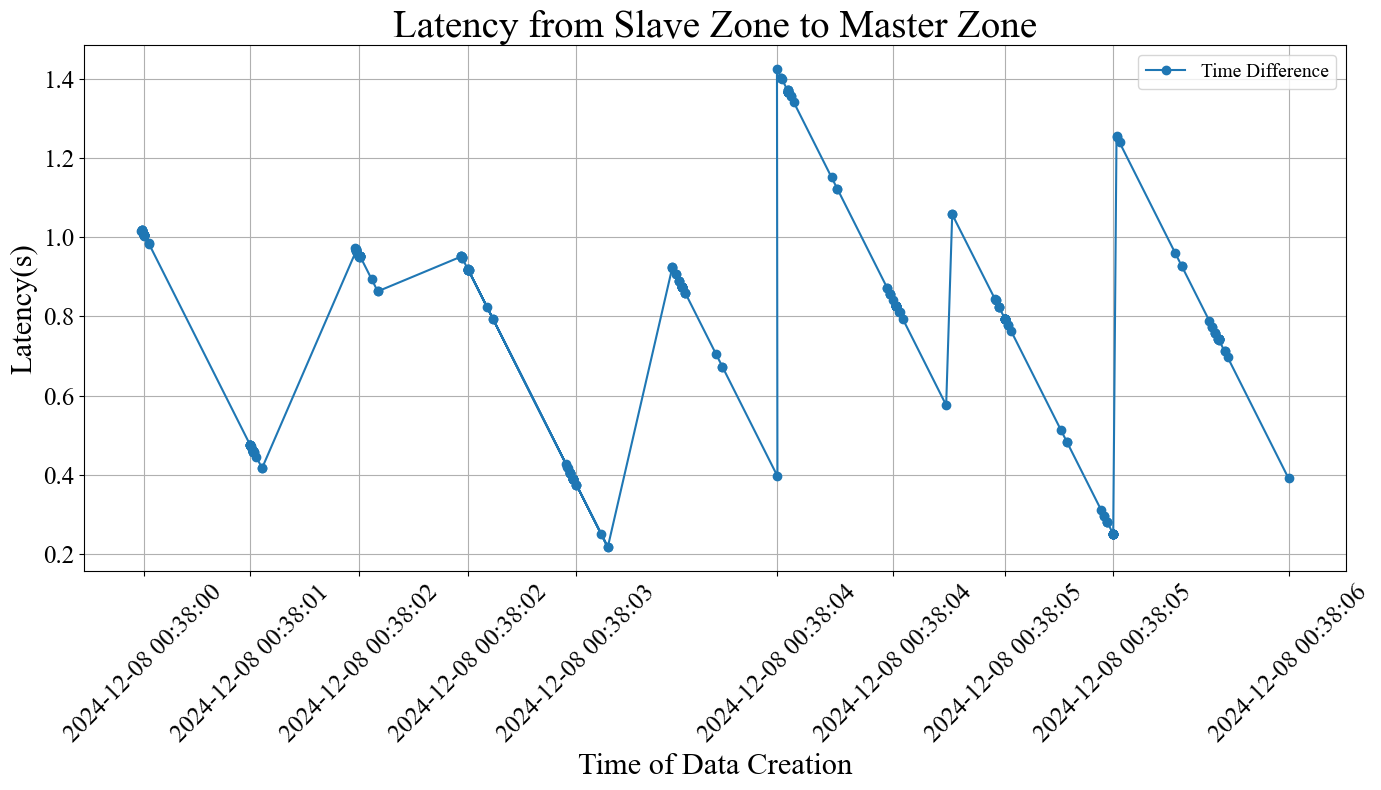

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.dates as mdates
import numpy as np

# Set Times New Roman font for all text
rcParams['font.family'] = 'Times New Roman'

# Read the CSV file
csv_file_path = "..\\logs\\Database.csv"  # Replace with your file path
df = pd.read_csv(csv_file_path)

# Convert columns to datetime
df['Time of Arrival'] = pd.to_datetime(df['Time of Arrival'])
df['Time of Creation'] = pd.to_datetime(df['Time of Creation'])

# Calculate the time difference (in seconds)
df['Time Difference'] = (df['Time of Arrival'] - df['Time of Creation']).dt.total_seconds()

# Plot
plt.figure(figsize=(14, 8))  # Increase figure size for better visibility
plt.plot(df['Time of Creation'], df['Time Difference'], marker='o', linestyle='-', label='Time Difference')

# Add labels and title with increased font size
plt.xlabel('Time of Data Creation', fontsize=22)  # Increase xlabel font size
plt.ylabel('Latency(s)', fontsize=22)  # Increase ylabel font size
plt.title('Latency from Slave Zone to Master Zone', fontsize=28)  # Increase title font size

# Rotate x-axis labels for better readability with increased font size
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18) 

# Explicitly set more x-axis ticks
x_ticks = np.linspace(0, len(df) - 1, num=10, dtype=int)  # Choose 10 ticks evenly spaced
plt.gca().set_xticks(df['Time of Creation'].iloc[x_ticks])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))

# Add legend with increased font size
plt.legend(fontsize=14)

# Show grid with larger font for grid ticks
plt.grid(visible=True)

# Show the plot
plt.tight_layout()
plt.show()



## Latency to Local Master Node

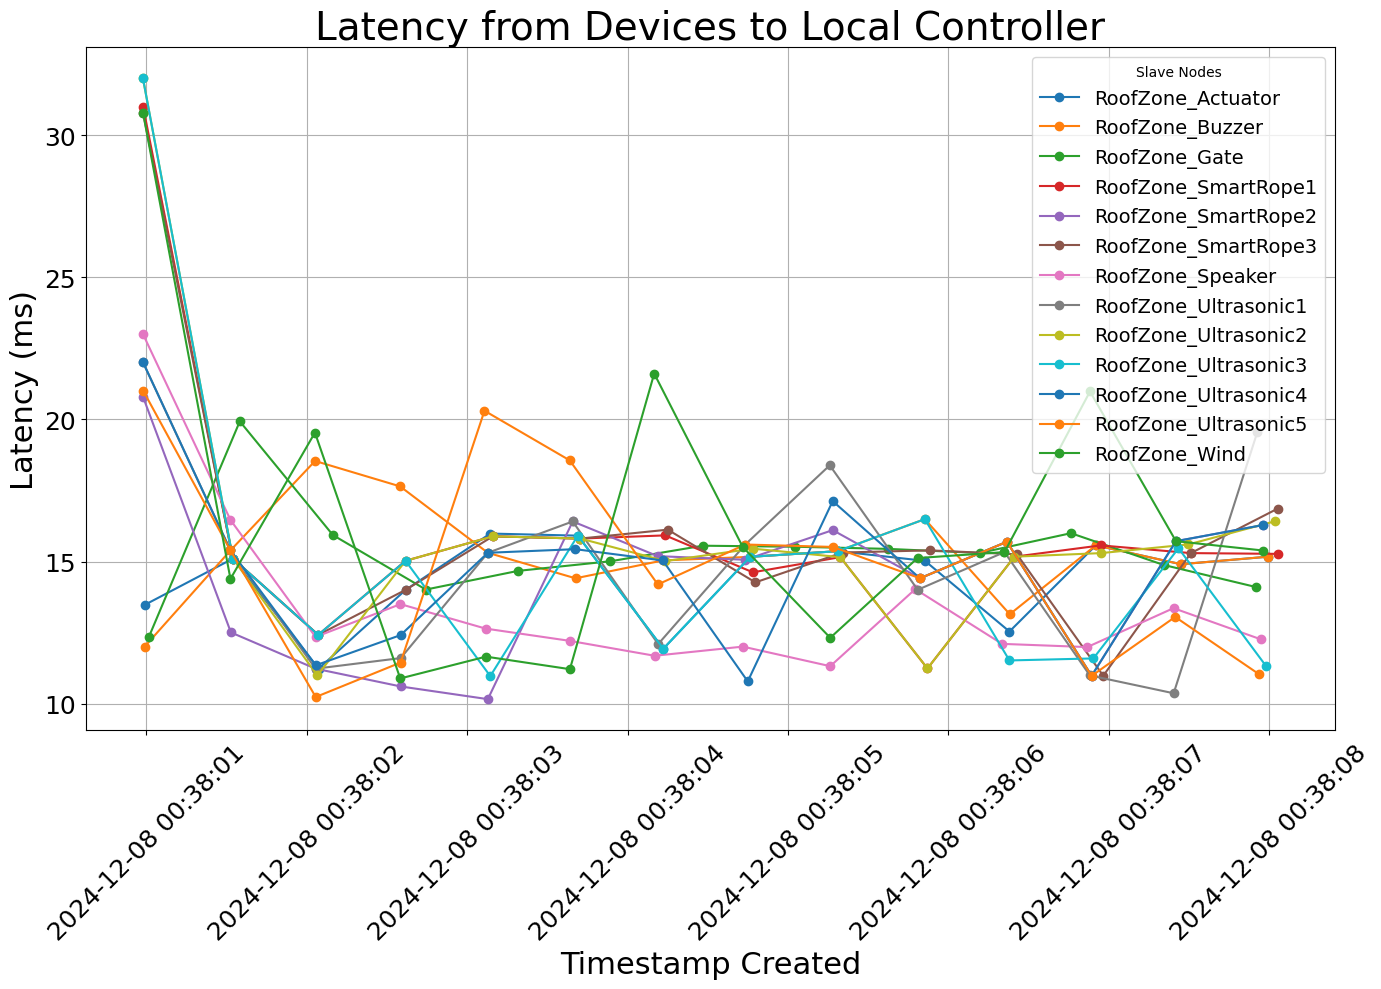

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

# Read logs from file
logs = []
file_path = "..\\logs\\RoofZone_MasterNode_output.csv"

with open(file_path, 'r') as file:
    logs = file.readlines()

# Parse logs into a DataFrame
data = []
for log in logs:
    try:
        # Extract timestamps
        timestamp_initial = log.split(",")[0].strip()
        timestamp_created = log.split("created @ [")[1].split("]")[0].strip()
        
        # Extract slave node
        slave_node_start = log.find("from slave node [") + len("from slave node [")
        slave_node_end = log.find("]", slave_node_start)
        slave_node = log[slave_node_start:slave_node_end]
        
        # Compute latency (in milliseconds)
        time_initial_dt = datetime.fromisoformat(timestamp_initial)
        time_created_dt = datetime.fromisoformat(timestamp_created)
        latency = (time_initial_dt - time_created_dt).total_seconds() * 1000  # Convert to milliseconds
        
        # Append parsed data
        data.append({"slave_node": slave_node, "timestamp_created": time_created_dt, "latency": latency})
    except (IndexError, ValueError):
        # Handle improperly formatted logs
        continue

# Create a DataFrame
df = pd.DataFrame(data)

# Group data by slave node
grouped = df.groupby("slave_node")

# Plot all slave nodes on one figure
plt.figure(figsize=(14, 10))  # Increase the figure size if needed
for slave_node, group in grouped:
    plt.plot(group['timestamp_created'], group['latency'], marker='o', linestyle='-', label=slave_node.replace("Node",""))

# Formatting the plot
plt.xlabel('Timestamp Created', fontsize=22)  # Increase xlabel font size
plt.ylabel('Latency (ms)', fontsize=22)  # Increase ylabel font size
plt.title('Latency from Devices to Local Controller', fontsize=28)  # Increase title font size
plt.xticks(rotation=45, fontsize=18)  # Increase x-axis tick font size
plt.yticks(fontsize=18)  # Increase y-axis tick font size
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
plt.legend(title='Slave Nodes', fontsize=14)  # Increase legend font size
plt.grid(visible=True)

# Show plot
plt.tight_layout()
plt.show()
